In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
heart_data = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Exploratory Data Analysis

In [106]:
# Drop the id and dataset columns

heart_data.drop(['id','dataset'], axis=1, inplace=True)
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [110]:
# Display descriptive statistics
heart_data.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [107]:
# Separate numeric and categorical variables for visualization purposes
CATEGORICAL_COLS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
NUMERICAL_COLS = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

heart_cat = heart_data[CATEGORICAL_COLS]
heart_num = heart_data[NUMERICAL_COLS]

heart_cat.nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
thal       3
ca         4
dtype: int64

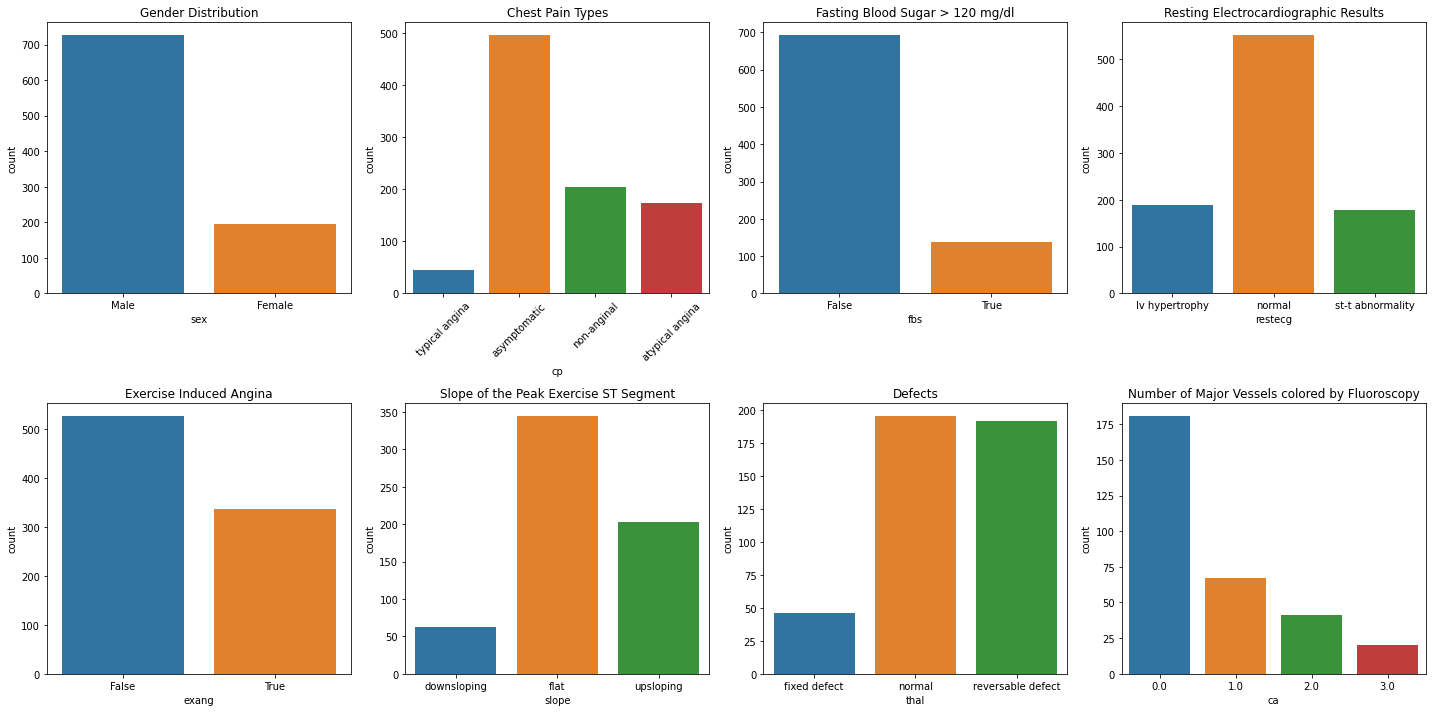

In [108]:
# Visualize the distribution of categorical variables 
fig, axes = plt.subplots(2, 4, figsize=(20,10))

sns.countplot(x='sex', data=heart_cat, ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')

sns.countplot(x='cp', data=heart_cat, ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Chest Pain Types')

sns.countplot(x='fbs', data=heart_cat, ax=axes[0,2])
axes[0,2].set_title('Fasting Blood Sugar > 120 mg/dl')

sns.countplot(x='restecg', data=heart_cat, ax=axes[0,3])
axes[0,3].set_title('Resting Electrocardiographic Results')

sns.countplot(x='exang', data=heart_cat, ax=axes[1,0])
axes[1,0].set_title('Exercise Induced Angina')

sns.countplot(x='slope', data=heart_cat, ax=axes[1,1])
axes[1,1].set_title('Slope of the Peak Exercise ST Segment')

sns.countplot(x='thal', data=heart_cat, ax=axes[1,2])
axes[1,2].set_title('Defects')

sns.countplot(x='ca', data=heart_cat, ax=axes[1,3])
axes[1,3].set_title('Number of Major Vessels colored by Fluoroscopy')
plt.tight_layout()
plt.show()

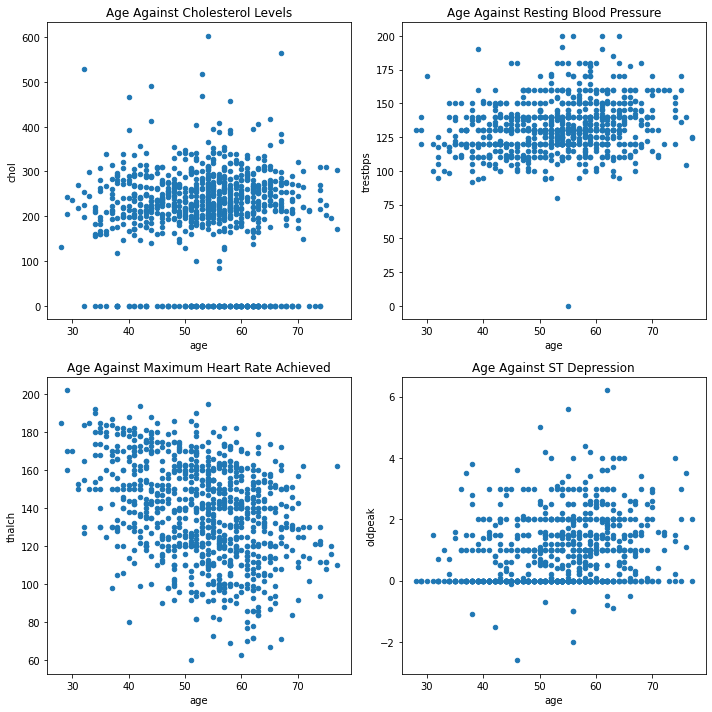

In [109]:
# Use scatterplots to visualize key relationships in numerical data
fig, axes = plt.subplots(2, 2, figsize=(10,10))

heart_num.plot('age', 'chol', kind='scatter', ax=axes[0,0])
axes[0,0].set_title('Age Against Cholesterol Levels')

heart_num.plot('age', 'trestbps', kind='scatter', ax=axes[0,1])
axes[0,1].set_title('Age Against Resting Blood Pressure')

heart_num.plot('age', 'thalch', kind='scatter', ax=axes[1,0])
axes[1,0].set_title('Age Against Maximum Heart Rate Achieved')

heart_num.plot('age', 'oldpeak', kind='scatter', ax=axes[1,1])
axes[1,1].set_title('Age Against ST Depression')

plt.tight_layout()
plt.show()

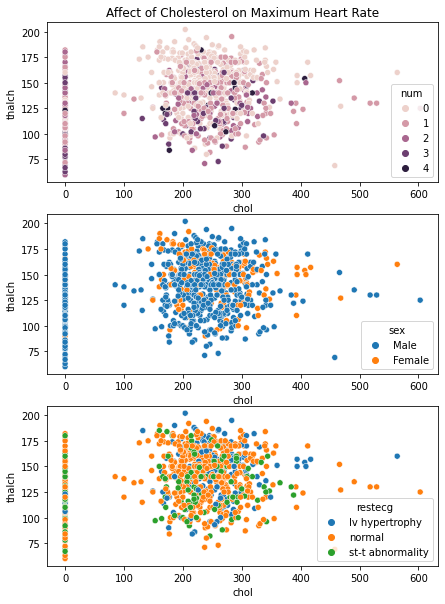

In [116]:
fig, axes = plt.subplots(3, figsize=(7,10))

sns.scatterplot(x='chol', y='thalch', hue='num', data=heart_data, ax=axes[0])
axes[0].set_title('Affect of Cholesterol on Maximum Heart Rate')

sns.scatterplot(x='chol', y='thalch', hue='sex', data=heart_data, ax=axes[1])

sns.scatterplot(x='chol', y='thalch', hue='restecg', data=heart_data, ax=axes[2])
plt.show()

In [ ]:
sns.scatterplot(x='trestbps', y='thalch', hue='restecg', data=heart_data)
plt.show()

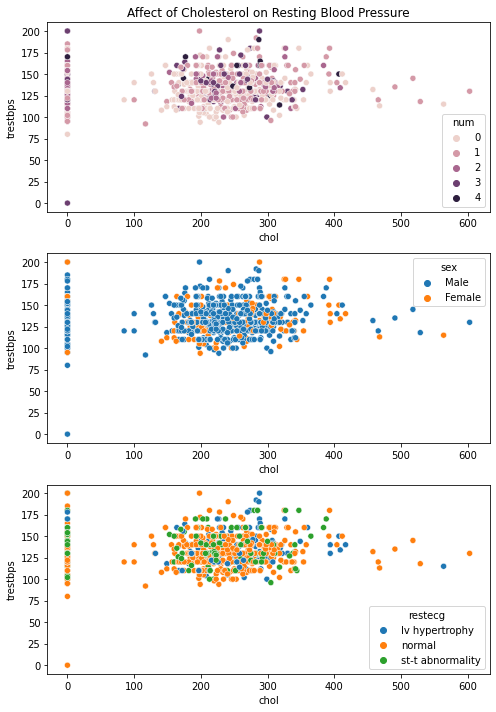

In [117]:
fig, axes = plt.subplots(3, figsize=(7,10))

axes[0].set_title('Affect of Cholesterol on Resting Blood Pressure')
sns.scatterplot(x='chol', y='trestbps', hue='num', data=heart_data, ax=axes[0])
sns.scatterplot(x='chol', y='trestbps', hue='sex', data=heart_data, ax=axes[1])
sns.scatterplot(x='chol', y='trestbps', hue='restecg', data=heart_data, ax=axes[2])

plt.tight_layout()
plt.show()

In [120]:
heart_data.groupby('num').mean()

,age,trestbps,chol,thalch,oldpeak,ca
num,,,,,,
0,50.547445,129.913043,227.905612,148.800512,0.418205,0.278788
1,53.528302,132.861111,195.255814,131.035714,1.001200,0.741379
2,57.577982,133.613861,143.859813,128.666667,1.353465,1.222222
3,59.214953,136.152174,159.716981,120.500000,1.581319,1.459459
4,59.214286,138.720000,192.148148,127.846154,2.307692,1.692308


In [122]:
print('Average Cholesterol Level Based on Target Variable and Chest Pain Type')
print(pd.crosstab(index=heart_data.num, columns=heart_data.cp, values=heart_data.chol, aggfunc=np.mean))
print('\n')

print('Average Cholesterol Level Based on Target Variable and Patient Gender')
print(pd.crosstab(index=heart_data.num, columns=heart_data.sex, values=heart_data.chol, aggfunc=np.mean))
print('\n')

print('Average Cholesterol Level Based on Target Variable and Cardiographic Results')
print(pd.crosstab(index=heart_data.num, columns=heart_data.restecg, values=heart_data.chol, aggfunc=np.mean))

Average Cholesterol Level Based on Target Variable and Chest Pain Type
cp   asymptomatic  atypical angina  non-anginal  typical angina
num                                                            
0      227.843137       233.957143   222.209677      222.730769
1      193.273684       250.157895   170.756757      215.250000
2      152.321839       123.000000   118.642857       58.500000
3      157.219512       200.000000   152.888889      228.666667
4      196.478261              NaN   146.000000      231.000000


Average Cholesterol Level Based on Target Variable and Patient Gender
sex      Female        Male
num                        
0    248.102190  217.054902
1    221.366667  191.820175
2    216.400000  136.381443
3    216.250000  155.102041
4    316.000000  182.240000


Average Cholesterol Level Based on Target Variable and Cardiographic Results
restecg  lv hypertrophy      normal  st-t abnormality
num                                                  
0            251.768293  2

               age  trestbps      chol    thalch   oldpeak        ca       num
age       1.000000  0.244253 -0.086234 -0.365778  0.258243  0.370416  0.339596
trestbps  0.244253  1.000000  0.092853 -0.104899  0.161908  0.093705  0.122291
chol     -0.086234  0.092853  1.000000  0.236121  0.047734  0.051606 -0.231547
thalch   -0.365778 -0.104899  0.236121  1.000000 -0.151174 -0.264094 -0.366265
oldpeak   0.258243  0.161908  0.047734 -0.151174  1.000000  0.281817  0.443084
ca        0.370416  0.093705  0.051606 -0.264094  0.281817  1.000000  0.516216
num       0.339596  0.122291 -0.231547 -0.366265  0.443084  0.516216  1.000000


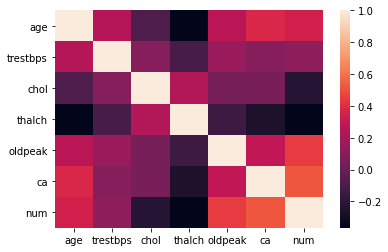

In [123]:
# Display correlation matrix and heatmap
corr = heart_data.corr()
print(corr)

sns.heatmap(corr)
plt.show()

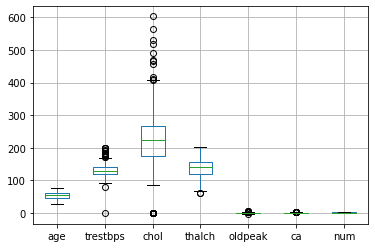

In [124]:
# Display boxplot to visualize outliers in the data

heart_data.boxplot()
plt.show()

In [125]:
heart_data.loc[heart_data['chol']==0,:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,32,Male,typical angina,95.0,0.0,NaN,normal,127.0,False,0.7,upsloping,NaN,NaN,1
598,34,Male,asymptomatic,115.0,0.0,NaN,NaN,154.0,False,0.2,upsloping,NaN,NaN,1
599,35,Male,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
600,36,Male,asymptomatic,110.0,0.0,NaN,normal,125.0,True,1.0,flat,NaN,fixed defect,1
601,38,Female,asymptomatic,105.0,0.0,NaN,normal,166.0,False,2.8,upsloping,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,43,Male,asymptomatic,122.0,0.0,False,normal,120.0,False,0.5,upsloping,NaN,NaN,1
819,63,Male,non-anginal,130.0,0.0,True,st-t abnormality,160.0,False,3.0,flat,NaN,NaN,0
822,48,Male,non-anginal,102.0,0.0,NaN,st-t abnormality,110.0,True,1.0,downsloping,NaN,NaN,1
839,56,Male,asymptomatic,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1


# Data Cleaning

In this section we will drop columns with a considerable amount of missing data as well as impute data where necessary. We do not wish to drop any outliers beyond logical reason. For example, we may not drop or impute values for patients with cholesterol levels ~500 since such high values make sense for the given data set. However, patients with cholesterol levels at 0 may be erroneous entries.

In [144]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 43.1+ KB


In [168]:
# Cholesterol Levels

median_chol = heart_data.loc[heart_data['chol']!=0, 'chol'].median()
heart_df = heart_data.fillna(value={'chol': median_chol})
heart_df.loc[heart_df['chol']==0, 'chol'] = median_chol 

In [169]:
# Resting Blood Pressure

mean_bp = heart_df.loc[heart_df['trestbps']!=0,'trestbps'].mean()
heart_df = heart_df.fillna(value={'trestbps': mean_bp})
heart_df.loc[heart_df['trestbps']==0, 'trestbps'] = mean_bp 

In [170]:
# Maximum Heart Rate

mean_hr = heart_df.loc[heart_df['thalch']!=0,'thalch'].mean()
heart_df = heart_df.fillna(value={'thalch': mean_hr})
heart_df.loc[heart_df['thalch']==0, 'thalch'] = mean_hr

In [171]:
# Old Peak

mean_peak = heart_df.oldpeak.mean()
heart_df = heart_df.fillna(value={'oldpeak': mean_peak})
heart_df.loc[heart_df['oldpeak']==0, 'oldpeak'] = mean_peak

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


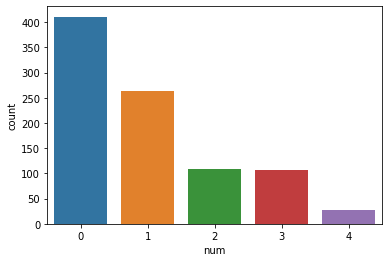

In [172]:
# Drop columns with a great number of missing values and reassign datatypes

heart_df.drop(labels=['ca','thal','slope'], axis=1, inplace=True)
heart_df = heart_df.astype({'sex':'category', 'cp':'category', 'fbs':'bool', 'restecg':'category', 'exang':'bool'})

# Drop remaining rows with missing values and display distribution for target variables

heart_df.dropna(inplace=True)
sns.countplot('num', data=heart_df)
plt.show()

As we can see, our dataset is greatly imbalanced. We must be mindful that the accuracy of the models we implement will be misleading. We will explore several methods for dealing with imbalanced data including SMOTE oversampling and the adjusting of Class Weights to tackle this issue

## Preparing the Data for Model Training

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [174]:
# One hot encode the categorical variables and split the target and independent variables
heart_onehot = pd.get_dummies(heart_df, columns=['sex','cp', 'fbs', 'restecg', 'exang'])

X = heart_onehot.drop('num', axis=1)
y = heart_onehot.num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train.value_counts()

0    340
1    204
3     86
2     82
4     22
Name: num, dtype: int64

In [175]:
heart_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       918 non-null    int64  
 1   trestbps                  918 non-null    float64
 2   chol                      918 non-null    float64
 3   thalch                    918 non-null    float64
 4   oldpeak                   918 non-null    float64
 5   num                       918 non-null    int64  
 6   sex_Female                918 non-null    uint8  
 7   sex_Male                  918 non-null    uint8  
 8   cp_asymptomatic           918 non-null    uint8  
 9   cp_atypical angina        918 non-null    uint8  
 10  cp_non-anginal            918 non-null    uint8  
 11  cp_typical angina         918 non-null    uint8  
 12  fbs_False                 918 non-null    uint8  
 13  fbs_True                  918 non-null    uint8  
 14  restecg_lv

## Decision Tree Classifier

In [176]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [177]:
weights = {0:1, 1:0.5, 2:0.5, 3:0.5, 4:0.5}

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.92      0.75        71
           1       0.40      0.32      0.36        59
           2       0.36      0.15      0.21        27
           3       0.31      0.19      0.24        21
           4       0.20      0.33      0.25         6

    accuracy                           0.51       184
   macro avg       0.38      0.38      0.36       184
weighted avg       0.47      0.51      0.47       184



In [178]:
# Perform Decision Tree model with class weighting
weights = {0:1, 1:0.5, 2:0.5, 3:0.5, 4:0.5}

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, class_weight='balanced')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71        71
           1       0.45      0.37      0.41        59
           2       0.29      0.37      0.33        27
           3       0.30      0.33      0.32        21
           4       0.14      0.33      0.20         6

    accuracy                           0.48       184
   macro avg       0.39      0.42      0.39       184
weighted avg       0.52      0.48      0.50       184



## Gradient Boosting

In [179]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.02, max_depth=3, n_estimators=150)
gradient_booster.fit(X_train, y_train)
y_pred = gradient_booster.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73        71
           1       0.44      0.46      0.45        59
           2       0.33      0.07      0.12        27
           3       0.45      0.24      0.31        21
           4       0.50      0.33      0.40         6

    accuracy                           0.54       184
   macro avg       0.47      0.40      0.40       184
weighted avg       0.50      0.54      0.49       184



## Random Forest Classifier

In [190]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.87      0.72        71
           1       0.44      0.41      0.42        59
           2       0.23      0.11      0.15        27
           3       0.33      0.24      0.28        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       184
   macro avg       0.32      0.33      0.31       184
weighted avg       0.45      0.51      0.47       184



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
clf = RandomForestClassifier(n_estimators=150, class_weight='balanced_subsample')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.90      0.74        71
           1       0.45      0.41      0.43        59
           2       0.30      0.11      0.16        27
           3       0.37      0.33      0.35        21
           4       0.00      0.00      0.00         6

    accuracy                           0.53       184
   macro avg       0.35      0.35      0.34       184
weighted avg       0.47      0.53      0.49       184



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree With SMOTE

In [181]:
from imblearn.over_sampling import SMOTE

In [182]:
smt = SMOTE(sampling_strategy='not majority')

print('Before', y_train.value_counts())

X_train_SM, y_train_SM = smt.fit_resample(X_train, y_train)

val, counter = np.unique(y_train_SM, return_counts=True)
print('After', (val, counter))

Before 0    340
1    204
3     86
2     82
4     22
Name: num, dtype: int64
After (array([0, 1, 2, 3, 4]), array([340, 340, 340, 340, 340]))


In [189]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6)
clf.fit(X_train_SM, y_train_SM)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69        71
           1       0.39      0.29      0.33        59
           2       0.11      0.07      0.09        27
           3       0.21      0.33      0.25        21
           4       0.09      0.17      0.12         6

    accuracy                           0.42       184
   macro avg       0.29      0.32      0.30       184
weighted avg       0.42      0.42      0.42       184



# Conclusion
Imbalanced multi-class classification problems can prove to be a challenge for data scientists looking to provide accurate models for real-world problems. Using accuracy is misleading in this case as it does not describe the performance of our model across each of the target variables. The f1 score is a more reliable metric as it calculates the percentage of positive predictions that are correct for each target variable.

The two techniques used for our models (SMOTE and Class-Weighting) did not show major improvements to our results. We note that the Decision Tree with SMOTE performed worse than the original model. Class-Weighting did not raise the accuracy of our model, however we notice a slight improvement in the f1 score of the minority classes. 

***Moving Forward***\
After running these models, there are several steps we can take to improve our performance. I would love to use hyperparameter tuning methods such as GridSearch or Bayesian Optimization to fine tune the models. I believe that class weighting is a powerful tool and I plan on conducting a survey centered around classification models for various weights. While the results for SMOTE were disappointing, I believe it was due to the lack of original data for the minority classes (there were roughly 20 patients identified with a type 4 heart disease). Lack of data on such a scale would surely diminish the effectiveness of SMOTE. I am curious to see how SMOTE performs on a slightly larger dataset. I would also like to see how the model would performs with oversampling + cross validation.

As a parting notion, I believe that reworking this dataset into a binary classification problem would yield more promising results and is an exercise that I wish to tackle in the near future. If you've made it to this point, thanks for joining me on my data science journey. Feel free to leave any criticisms or suggestions as all feedback is welcome!